# Imports

In [184]:
# Manipulation & Visualization libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

# ML Models Libraries
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.naive_bayes     import BernoulliNB
from sklearn.tree            import DecisionTreeClassifier

# Data Balance Library
from imblearn.over_sampling  import SMOTE

# Metrics Libraries
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import precision_score
from sklearn.metrics         import recall_score
from sklearn.metrics         import f1_score

In [185]:
# Importing data 
df = pd.read_csv('data/Customer-Churn.csv')

# EDA

In [186]:
# Renaming the Columns
rename = {
    'Maior65Anos'            :'elder',
    'Conjuge'                :'married',
    'Dependentes'            :'dependents',
    'MesesDeContrato'        :'months_of_contract',
    'TelefoneFixo'           :'landline',
    'VariasLinhasTelefonicas':'multiple_phone_lines',
    'ServicoDeInternet'      :'internet_service',
    'SegurancaOnline'        :'online_protection',
    'BackupOnline'           :'online_backup',
    'SeguroNoDispositivo'    :'mobile_insurance',
    'SuporteTecnico'         :'tech_support',
    'TVaCabo'                :'tv',
    'StreamingDeFilmes'      :'movie_stream',
    'TipoDeContrato'         :'contract_type',
    'PagamentoOnline'        :'online_payment',
    'FormaDePagamento'       :'payment_method',
    'ContaMensal'            :'month_bill',
    'Churn'                  :'churn',
}
df = df.rename(columns=rename)

### Descriptive analysis

In [187]:
# Data Shape
print(f'Columns: {df.shape[0]}')
print(f'Rows   : {df.shape[1]}')

Columns: 7043
Rows   : 18


In [189]:
cols = ['married','dependents','landline', 'multiple_phone_lines' ,'online_protection','online_backup','mobile_insurance','tech_support','tv','movie_stream','online_payment','churn' ]
for i in cols:
    df[i] = df[i].apply(lambda x: 'Yes' if x =='Sim' else 'No')

df.head()

,elder,married,dependents,months_of_contract,landline,multiple_phone_lines,internet_service,online_protection,online_backup,mobile_insurance,tech_support,tv,movie_stream,contract_type,online_payment,payment_method,month_bill,churn
0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Mensalmente,Yes,ChequeDigital,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,UmAno,No,ChequePapel,56.95,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Mensalmente,Yes,ChequePapel,53.85,Yes
3,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,UmAno,No,DebitoEmConta,42.30,No
4,0,No,No,2,Yes,No,FibraOptica,No,No,No,No,No,No,Mensalmente,Yes,ChequeDigital,70.70,Yes


In [190]:
df.dtypes

elder                     int64
married                  object
dependents               object
months_of_contract        int64
landline                 object
multiple_phone_lines     object
internet_service         object
online_protection        object
online_backup            object
mobile_insurance         object
tech_support             object
tv                       object
movie_stream             object
contract_type            object
online_payment           object
payment_method           object
month_bill              float64
churn                    object
dtype: object

In [191]:
# Describing Data
df.describe()

,elder,months_of_contract,month_bill
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


___
```
The most expensive bill is: $118,75
The cheapest bill is      : $18,25
The mean bill value is    : $64,76
The median is             : $70,35
_

The customer with more contract time has 72 months 
The customer with less contract time has 00 months
The mean time of contract is             32 months
The median is                            29 months
```
___

In [192]:
# Looking for Null-Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   elder                 7043 non-null   int64  
 1   married               7043 non-null   object 
 2   dependents            7043 non-null   object 
 3   months_of_contract    7043 non-null   int64  
 4   landline              7043 non-null   object 
 5   multiple_phone_lines  7043 non-null   object 
 6   internet_service      7043 non-null   object 
 7   online_protection     7043 non-null   object 
 8   online_backup         7043 non-null   object 
 9   mobile_insurance      7043 non-null   object 
 10  tech_support          7043 non-null   object 
 11  tv                    7043 non-null   object 
 12  movie_stream          7043 non-null   object 
 13  contract_type         7043 non-null   object 
 14  online_payment        7043 non-null   object 
 15  payment_method       

## Visualization

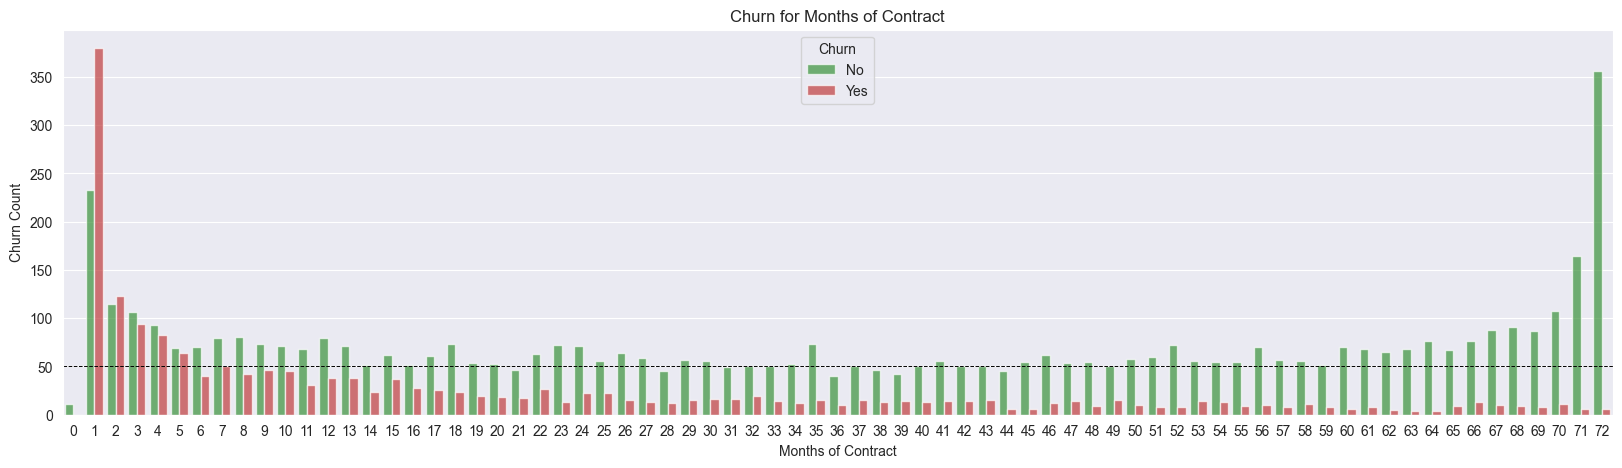

In [305]:
# Churn for Months of Contract
pallete = ['tab:green','tab:red']
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
sns.set_palette(pallete)
ax = sns.countplot(data=df , x='months_of_contract',hue='churn',alpha  = 0.7);
ax.set(title = 'Churn for Months of Contract');
ax.set(ylabel='Churn Count')
ax.set(xlabel='Months of Contract')
ax.legend(labels= ['No','Yes'],title='Churn')
ax.axhline(50,color='k',linestyle='--',linewidth='0.7');

In [194]:
df.contract_type = df.contract_type.apply(lambda x: 'Monthly' if x == 'Mensalmente' else 'One Year' if x == 'UmAno' else 'Two Years')

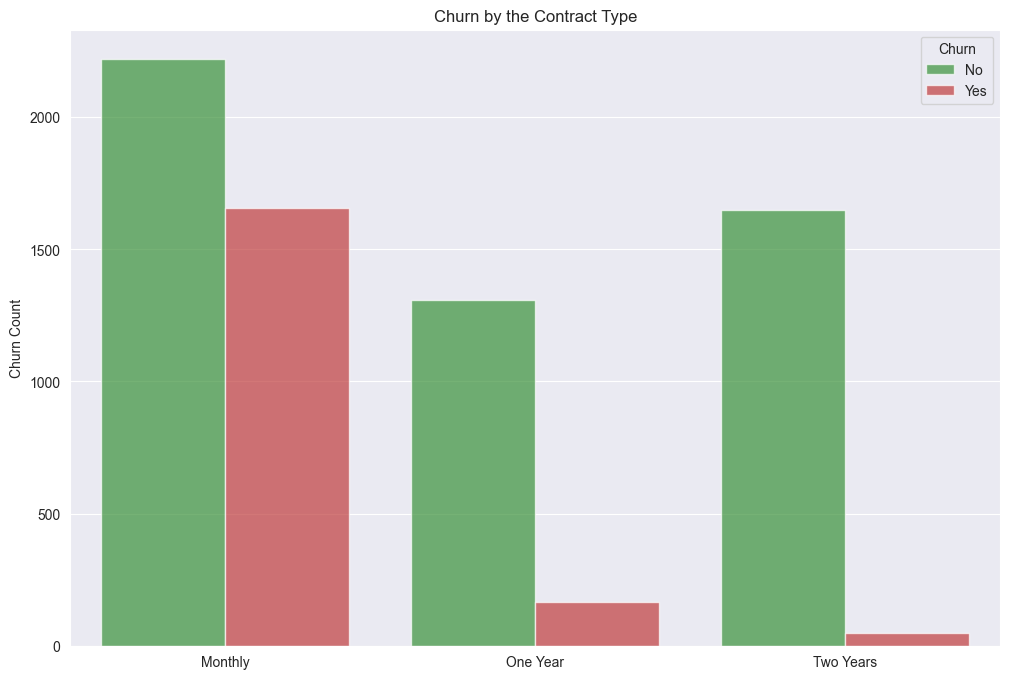

In [297]:
pallete = ['tab:green','tab:red']
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette(pallete)
ax = sns.countplot(data=df, x='contract_type',hue='churn',alpha  = 0.7);
ax.set(title = 'Churn by the Contract Type');
ax.set(ylabel='Churn Count')
ax.set(xlabel=' ')
ax.legend(labels= ['No','Yes'],title='Churn');

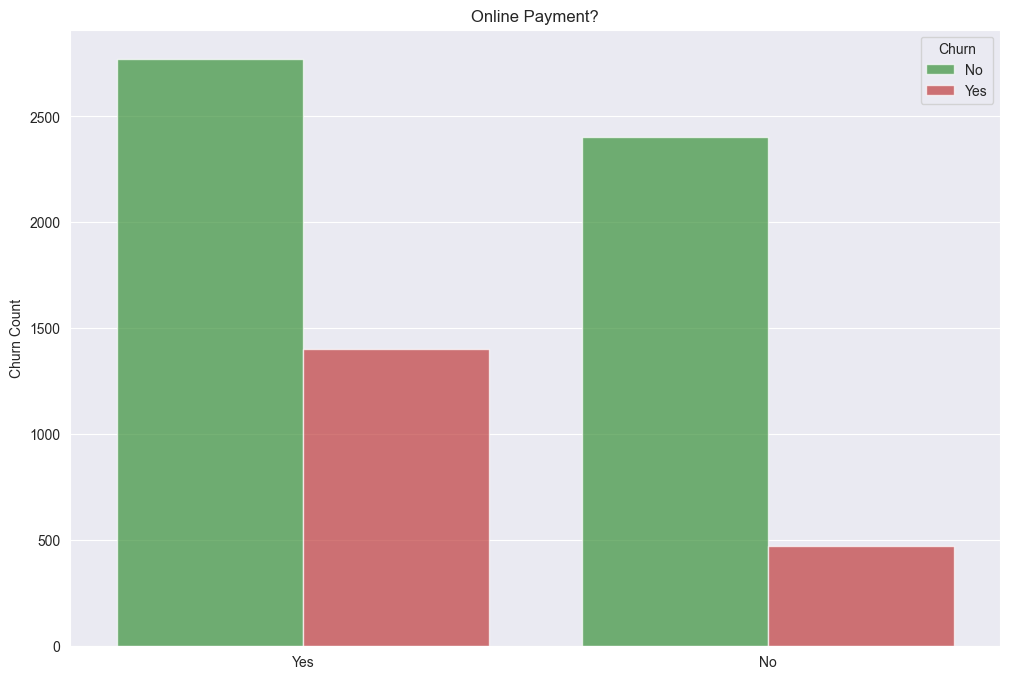

In [298]:
pallete = ['tab:green','tab:red']
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette(pallete)
ax = sns.countplot(data=df , x='online_payment',hue='churn',alpha  = 0.7);
ax.set(title = 'Online Payment?');
ax.set(ylabel='Churn Count')
ax.set(xlabel=' ')
ax.legend(labels= ['No','Yes'],title='Churn');

[Text(0.5, 0, 'Bill Price (USD)')]

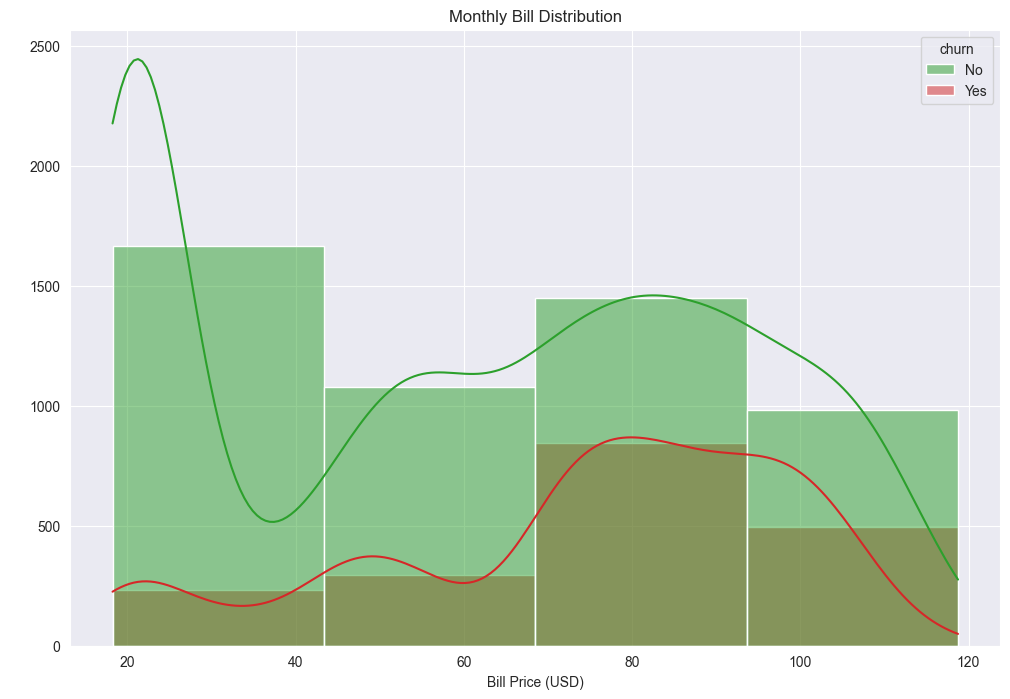

In [270]:
pallete = ['tab:green','tab:red']
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette(pallete)
ax = sns.histplot(data=df , x='month_bill',bins=4,kde=True,hue='churn');
ax.set(title = 'Monthly Bill Distribution');
ax.set(ylabel=' ')
ax.set(xlabel='Bill Price (USD)');
#ax.legend(labels= ['Density','Qunatity']);

In [263]:
df['price_intervals'] = df.month_bill.apply(lambda x: 'Cheap (0-40 USD)' if x <= 40 else 'Medium (40-60 USD)' if 40 < x <= 60 else 'Expensive (60-100 USD)' if 60 < x <= 100 else 'Expensive+ (100+ USD)')

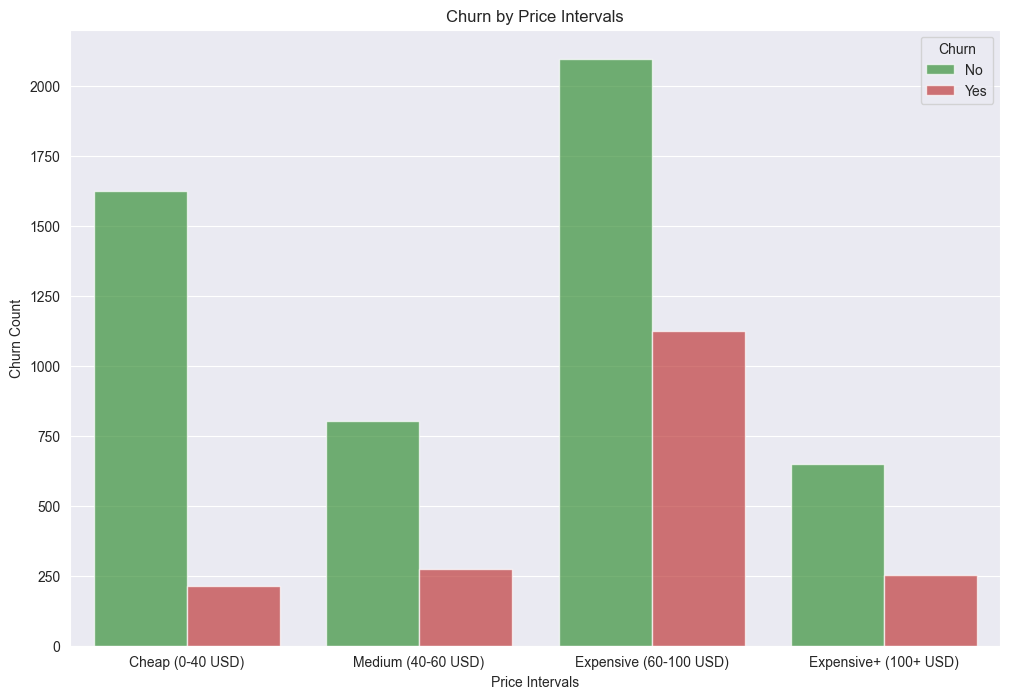

In [299]:
pallete = ['tab:green','tab:red']
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette(pallete)
ax = sns.countplot(data=df , x='price_intervals',hue='churn',alpha  = 0.7);
ax.set(title = 'Churn by Price Intervals');
ax.set(ylabel='Churn Count')
ax.set(xlabel='Price Intervals')
ax.legend(labels= ['No','Yes'],title='Churn');

In [272]:
df['payment_method'] = df.payment_method.apply(lambda x: 'eletronic_check' if x == 'ChequeDigital' else 'mail_check' if x == 'ChequePapel' else 'bank_transfer' if x == 'DebitoEmConta' else 'credit_card')

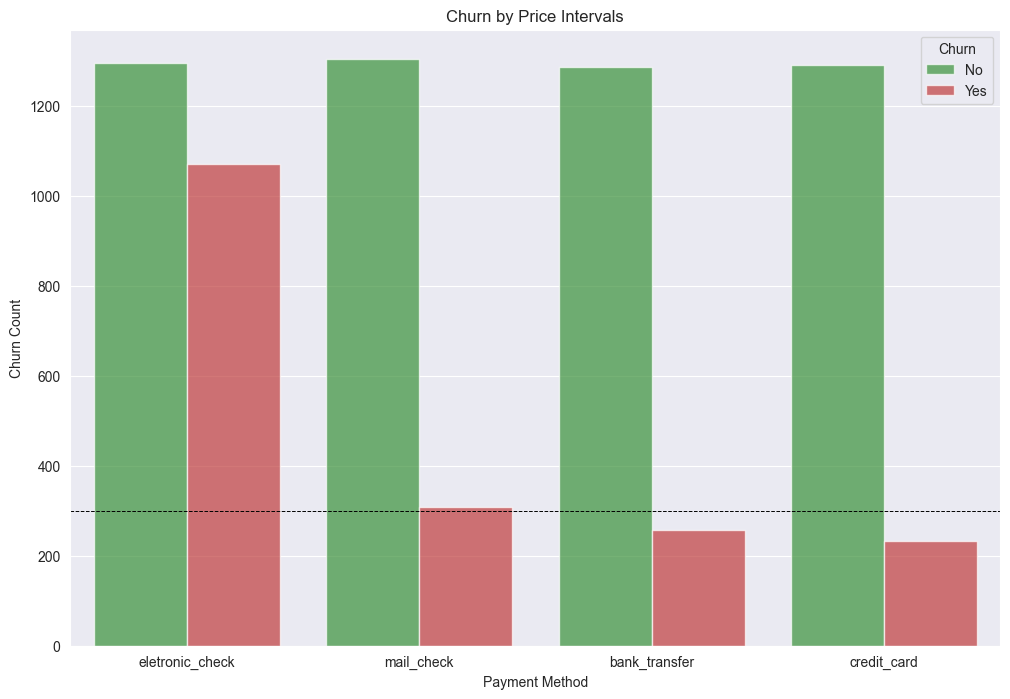

In [293]:
pallete = ['tab:green','tab:red']
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette(pallete)
ax = sns.countplot(data=df , x='payment_method',hue='churn',alpha  = 0.7);
ax.set(title = 'Churn by Price Intervals');
ax.set(ylabel='Churn Count')
ax.set(xlabel='Payment Method')
ax.legend(labels= ['No','Yes'],title='Churn');
ax.axhline(300,color='k',linestyle='--',linewidth='0.7');

<Figure size 1200x800 with 0 Axes>

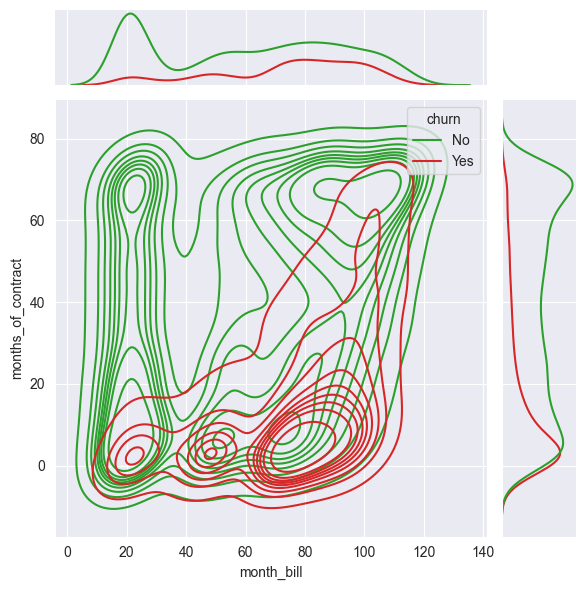

In [295]:
pallete = ['tab:green','tab:red']
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette(pallete)
g = sns.jointplot(data=df, x='month_bill',y='months_of_contract',hue='churn',kind='kde');

## Data Balance

In [197]:
# Transforming Yes/No to Binary

binary_change = {
    'Sim':1,
    'Nao':0
}

df2 = df[['married','dependents','landline','online_payment','churn']].replace(binary_change)
df2.head()

,married,dependents,landline,online_payment,churn
0,Yes,No,No,Yes,No
1,No,No,Yes,No,No
2,No,No,Yes,Yes,Yes
3,No,No,No,No,No
4,No,No,Yes,Yes,Yes


In [198]:
# get_dummies
data_dummies = pd.get_dummies(df.drop(['married','dependents','landline','online_payment','churn'],
                axis=1))

# Concatenating data into a full binary converted dataframe
df3 = pd.concat([df2, data_dummies], axis=1)

In [199]:
# Display all 39 cloumns at once
pd.set_option('display.max_columns', 39)

In [200]:
# Quick check into the new dataframe
df3.head()

,married,dependents,landline,online_payment,churn,elder,months_of_contract,month_bill,multiple_phone_lines_No,multiple_phone_lines_Yes,internet_service_DSL,internet_service_FibraOptica,internet_service_Nao,online_protection_No,online_protection_Yes,online_backup_No,online_backup_Yes,mobile_insurance_No,mobile_insurance_Yes,tech_support_No,tech_support_Yes,tv_No,tv_Yes,movie_stream_No,movie_stream_Yes,contract_type_Monthly,contract_type_One Year,contract_type_Two Years,payment_method_CartaoDeCredito,payment_method_ChequeDigital,payment_method_ChequePapel,payment_method_DebitoEmConta
0,Yes,No,No,Yes,No,0,1,29.85,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0
1,No,No,Yes,No,No,0,34,56.95,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
2,No,No,Yes,Yes,Yes,0,2,53.85,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
3,No,No,No,No,No,0,45,42.30,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1
4,No,No,Yes,Yes,Yes,0,2,70.70,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0


In [201]:
# Creating my X and y variables befor Train/Test Split
X = df3.drop('churn', axis=1)
y = df3.churn

In [202]:
# Transforming imbalanced data into balanced data
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

df3 = pd.concat([X,y],axis=1)

ValueError: could not convert string to float: 'Yes'

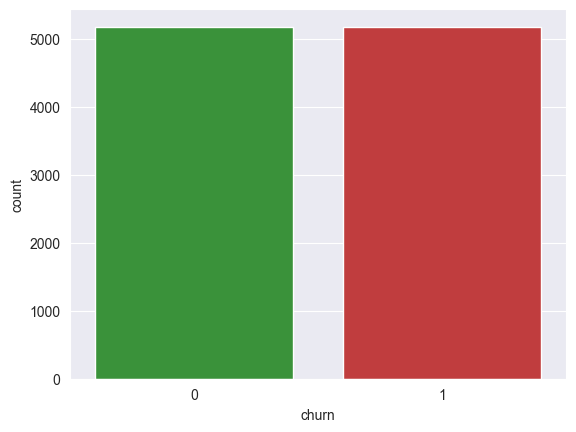

In [ ]:
# Checking the new variable for data balancing
ax = sns.countplot(x='churn', data=df3)

In [ ]:
df3.churn.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

In [ ]:
# Normalizing data before Modeling

norm = StandardScaler()

X_normalized = norm.fit_transform(X)

# Modeling

## Train / Test Split

In [ ]:
# Splitting the dataset into X train, X test, y train and y test
X_train,X_test,y_train,y_test = train_test_split(X_normalized,y, test_size=.3, random_state=123)

## KNN method ( Proximity )

In [ ]:
# KNN instance
knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
# Fitting the data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Predicting new data
KNN_predicted = knn.predict(X_test)

In [ ]:
# Checking the predicted values
KNN_predicted

array([1, 0, 0, ..., 0, 1, 1])

## Naive Bayes Method ( Probabilistic )

In [ ]:
np.median(X_train)

-0.4461759755508453

In [ ]:
bnb = BernoulliNB(binarize=-0.52)

In [ ]:
bnb.fit(X_train,y_train)

BernoulliNB(binarize=-0.52)

In [ ]:
NB_predict = bnb.predict(X_test)

In [ ]:
NB_predict

array([1, 0, 0, ..., 1, 1, 1])

## Decision Tree ( Gini Impurity )

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.feature_importances_

array([0.01851535, 0.01601779, 0.00709956, 0.02593467, 0.01653463,
       0.15375989, 0.19085273, 0.01032415, 0.00262905, 0.00474255,
       0.00245082, 0.03912695, 0.        , 0.0058642 , 0.        ,
       0.0268139 , 0.00684567, 0.        , 0.00970669, 0.00836868,
       0.        , 0.00691852, 0.00738136, 0.        , 0.01916241,
       0.00462794, 0.        , 0.00390904, 0.00618869, 0.00452808,
       0.00452011, 0.21494367, 0.08259632, 0.02720861, 0.01790613,
       0.01756289, 0.01517078, 0.02178818])

In [ ]:
DTC_predict = dtc.predict(X_test)

In [ ]:
DTC_predict

array([0, 0, 0, ..., 0, 1, 1])

## Model Validation

### Confusion Matrix

In [ ]:
print(f'The confusion matrix for the KNN model, is:\n {confusion_matrix(y_test, KNN_predicted)}\n')
print(f'The confusion matrix for the NB  model, is:\n {confusion_matrix(y_test,    NB_predict)}\n')
print(f'The confusion matrix for the DTC model, is:\n {confusion_matrix(y_test,   DTC_predict)}')

The confusion matrix for the KNN model, is:
 [[1240  329]
 [ 247 1289]]

The confusion matrix for the NB  model, is:
 [[1168  401]
 [ 393 1143]]

The confusion matrix for the DTC model, is:
 [[1243  326]
 [ 275 1261]]


### Accuracy

Accuracy == TP+TN / TP+FP+TN+FN

In [ ]:
print(f'The accuracy for the KNN model, is: {accuracy_score(y_test, KNN_predicted).round(4)}\n')
print(f'The accuracy for the NB  model, is: {accuracy_score(y_test,   NB_predict ).round(4)}\n')
print(f'The accuracy for the DTC model, is: {accuracy_score(y_test,   DTC_predict).round(4)}')

The accuracy for the KNN model, is: 0.8145

The accuracy for the NB  model, is: 0.7443

The accuracy for the DTC model, is: 0.8064


### Precision

Precision == TP / TP+FP

In [ ]:
print(f'The precision for the KNN model, is: {precision_score(y_test, KNN_predicted).round(4)}\n')
print(f'The precision for the NB  model, is: {precision_score(y_test,   NB_predict ).round(4)}\n')
print(f'The precision for the DTC model, is: {precision_score(y_test,   DTC_predict).round(4)}')

The precision for the KNN model, is: 0.7967

The precision for the NB  model, is: 0.7403

The precision for the DTC model, is: 0.7946


### Recall

Recall == TP / TP+FN

In [ ]:
print(f'The recall for the KNN model, is: {recall_score(y_test, KNN_predicted).round(4)}\n')
print(f'The recall for the NB  model, is: {recall_score(y_test,   NB_predict ).round(4)}\n')
print(f'The recall for the DTC model, is: {recall_score(y_test,   DTC_predict).round(4)}')

The recall for the KNN model, is: 0.8392

The recall for the NB  model, is: 0.7441

The recall for the DTC model, is: 0.821


### F1 Score

F1 Score == 2 * precision*recall / precision + recall

In [ ]:
print(f'The f1_score for the KNN model, is: {f1_score(y_test, KNN_predicted).round(4)}\n')
print(f'The f1_score for the NB  model, is: {f1_score(y_test,   NB_predict ).round(4)}\n')
print(f'The f1_score for the DTC model, is: {f1_score(y_test,   DTC_predict).round(4)}')

The f1_score for the KNN model, is: 0.8174

The f1_score for the NB  model, is: 0.7422

The f1_score for the DTC model, is: 0.8076


__________________________________